## Analyze clusters among anomalies
The clustering approach can help to gain insight into the model by grouping the anomalous spectra into clusters based on their similarity in terms of the weights assigned by the LIME algorithm. This can help identify patterns or trends in the explanations that may not be immediately apparent from the weights alone.

For example, certain clusters might have higher explanation weights for certain wavelength ranges, or certain clusters have higher explanation weights overall. This can help to understand which features of the spectra are most important for the model's predictions, and can potentially uncover new scientific insights.

Additionally, by plotting the mean spectrum and mean explanation weights for each cluster, I can get a sense of how the model is using different features of the spectra to make its predictions, and identify any patterns or trends in the model's behavior that may be relevant to the anomaly detection task.

In [1]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

from astroExplain.spectra.explanation import TellMeWhy
from anomaly.constants import GALAXY_LINES

In [2]:
from typing import Tuple
from matplotlib.figure import Figure, Axes

def fig_axs_interpret_cluster(
    wave: np.array,
    mean_anomaly: np.array,
    median_anomaly: np.array,
    median_weights: np.array,
    mean_weights: np.array,
    fig_size=None,
) -> Tuple[Figure, Axes]:
    """
    Plot the mean and median anomaly and the mean and median
    explanation weights.

    INPUT

    wave: wavelength array
    mean_anomaly: mean anomaly array
    median_anomaly: median anomaly array
    median_weights: median explanation weights array
    mean_weights: mean explanation weights array
    fig_size: figure size

    OUTPUT

    fig: figure
    axs: axes
    """

    fig, axs = plt.subplots(
        nrows=3,
        ncols=1,
        figsize=fig_size,
        sharex=True,
        sharey=False,
        tight_layout=True,
    )

    axs[0].plot(wave, median_anomaly, c="black", label="Median")
    axs[0].set_ylabel("Normalized flux", fontsize=8)

    axs[1].plot(wave, mean_anomaly, c="black", label="Mean")
    axs[1].set_ylabel("Normalized flux", fontsize=8)

    axs[2].plot(wave, median_weights, color="black", label="Median")
    axs[2].plot(wave, mean_weights, color="blue", label="Mean")

    axs[2].set_ylabel("Explanation weight", fontsize=8)
    axs[2].set_ylim(0, 1.01)

    return fig, axs

In [3]:
# directories for data
bin_id = "bin_03"
user = "/home/edgar"
work_directory = f"{user}/spectra/0_01_z_0_5_4_0_snr_inf"
model = "256_128_64/latent_12"
iml_use_case_directory = (
    f"{user}/explain-me-why/sections/figures/iml_use_cases"
)

region_directory = (
    f"{iml_use_case_directory}/cluster_regions_of_interest/"
    "weights_all_abs"
)

# metric = "mse_filter_250kms_noRel97"
metric = "mse_noRel100"
# metric = "mse_filter_250kms_noRel100"
# metric = "mse_noRel97"
# metric = "mse_filter_250kms_rel100"
# metric = "mse_filter_250kms_rel97"
# metric = "mse_rel100"
# metric = "mse_rel97"
data_directory = f"{work_directory}/{bin_id}/explanation/{model}/{metric}"

In [4]:
wave = np.load(f"{work_directory}/wave_spectra_imputed.npy")
anomalies = np.load(f"{data_directory}/top_anomalies.npy")
df_anomalies = pd.read_csv(
    f"{data_directory}/top_anomalies.csv.gz", index_col="specobjid"
)

# load the weights
explanation_weights = np.load(
    f"{data_directory}/explanation_weights/weights_all_abs_"
    f"smooth_True_drop_0.05_{metric}_bin_03.npy"
)

In [5]:
explanation_weights.min(), explanation_weights.max()

(0.0, 1.0)

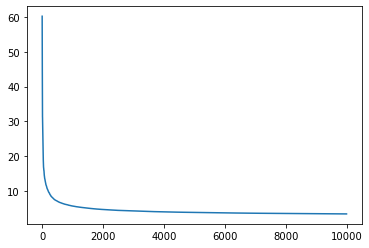

In [6]:
# sort scores in descending order in place in the df
df_anomalies.sort_values(by="score", ascending=False, inplace=True)
# reverse spectra in anomalies array as well
anomalies = anomalies[::-1]
plt.plot(df_anomalies["score"].to_numpy())

In [7]:
# # Create a list to store the evaluation metric values
# inertias = []
# n_clusters = range(2, 12)
# # Fit the k-means model with a range of values for the number of clusters
# for n in n_clusters:
#     kmeans = KMeans(n_clusters=n, random_state=0)
#     kmeans.fit(explanation_weights)
#     inertias.append(kmeans.inertia_)
#     print(f"n: {n}, inertia: {kmeans.inertia_}", end="\r")

In [8]:
# # Plot the evaluation metric values against the number of clusters
# fig, ax = plt.subplots(figsize=None)

# inertias = np.array(inertias)
# inertias = inertias / inertias.max()
# ax.plot(n_clusters, inertias, '-o')
# ax.set_xlabel('Number of clusters')
# ax.set_ylabel('Inertia')

# save_to = f"{user}/explain-me-why/sections/figures/iml_use_cases/"
# fig.savefig(f"{save_to}/kmeans_inertias_{metric}.pdf")

In [9]:
# # Use k-means clustering to group the spectra
# kmeans = KMeans(n_clusters=6, random_state=0)
# cluster_labels = kmeans.fit_predict(explanation_weights)

# # save Kmeans model
# model_name = f"kmeans_{metric}_bin_03.pkl"
# with open(f"{region_directory}/{model_name}", "wb") as f:
#     pickle.dump(kmeans, f)

Cluster N 0: 4074
Cluster N 1: 1307
Cluster N 2: 1003
Cluster N 3: 984
Cluster N 4: 1369
Cluster N 5: 1263


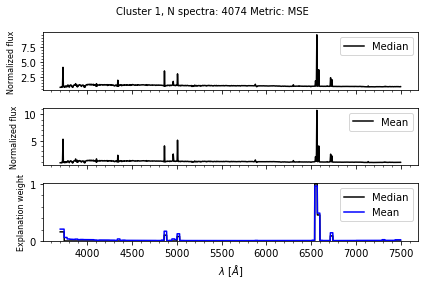

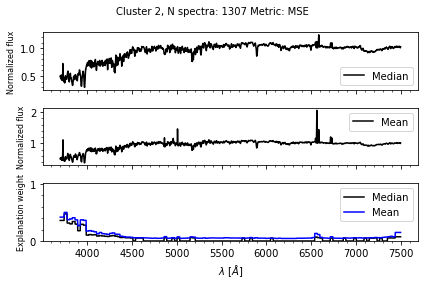

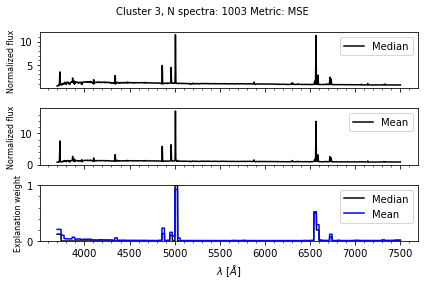

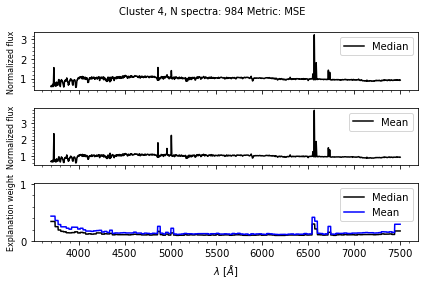

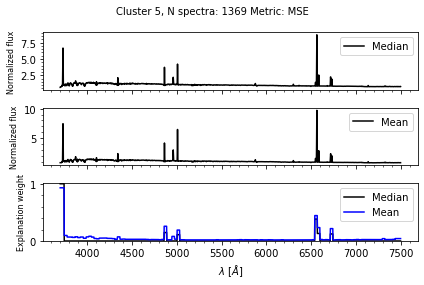

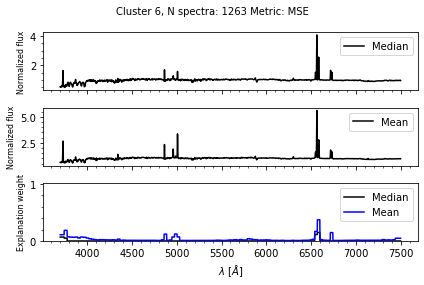

In [10]:
# # plot mean and median of the anomalies and explanation weights
# # per cluster
# n_clusters = kmeans.n_clusters

# for cluster_number in range(n_clusters):

#     # Select the spectra in the cluster
#     cluster_anomalies = anomalies[cluster_labels == cluster_number]

#     n_spectra_in_cluster = len(cluster_anomalies)

#     cluster_weights = explanation_weights[cluster_labels == cluster_number]
#     cluster_mean_anomaly = np.mean(cluster_anomalies, axis=0)
#     cluster_median_anomaly = np.median(cluster_anomalies, axis=0)

#     # Compute summary statistics for the explanations in the cluster
#     cluster_median_weights = np.median(cluster_weights, axis=0)
#     cluster_mean_weights = np.mean(cluster_weights, axis=0)
#     cluster_std_weights = np.std(cluster_weights, axis=0)

#     fig, axs = fig_axs_interpret_cluster(
#         wave,
#         mean_anomaly=cluster_mean_anomaly,
#         median_anomaly=cluster_median_anomaly,
#         median_weights=cluster_median_weights,
#         mean_weights=cluster_mean_weights,
#         fig_size=None,
#     )

#     axs[2].set_xlabel("$\lambda$ [$\AA$]")

#     for ax in axs:
#         ax.legend()
#         ax.minorticks_on()

#     if metric == "mse_filter_250kms_noRel97":
        
#         metric_name = "MSE filter $250$ km~s$^{-1}$ ignore $3\%$"
    
#     elif metric == "mse_noRel100":

#         metric_name = "MSE"


#     fig.suptitle(
#         (
#             f"Cluster {cluster_number + 1}, "
#             f"N spectra: {n_spectra_in_cluster} "
#             f"Metric: {metric_name}"
#         ),
#         fontsize=10,
#     )

#     print(f"Cluster N {cluster_number}: " f"{n_spectra_in_cluster}")

#     # create cluster directory if it does not exist
    
#     if metric == "mse_filter_250kms_noRel97":
        
#         subdirectory = "filter_mse"
    
#     elif metric == "mse_noRel100":
    
#         subdirectory = "mse"

#     cluster_directory = (
#         f"{region_directory}/{subdirectory}"
#     )

#     if not os.path.exists(cluster_directory):
#         os.makedirs(cluster_directory)

#     fig.savefig(
#         f"{cluster_directory}/"
#         f"cluster_{cluster_number}_metric_{metric}_bin_{bin_id}.pdf"
#     )